# LAB 9 : Transformers

Name : 

Roll Number : 

Preprocessing :   

1. PyTorch tutorial : https://github.com/yunjey/pytorch-tutorial
2. Tranformer : http://peterbloem.nl/blog/transformers
3. Text Preprocessing : https://www.analyticsvidhya.com/blog/2021/06/must-known-techniques-for-text-preprocessing-in-nlp/
4. More abou Self Attention : https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a

#**Problem 1** : Building a Transformer

1. Build a Self Attention Block
2. Use the self attection block to build a transformer block

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming : 
  Please write a program to demonstrate the same

**Self Attention Block**

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

import random, math

class SelfAttention(nn.Module):
    def __init__(self, emb, heads=8, mask=False):

        """
        :param emb:
        :param heads:
        :param mask:
        """
        super().__init__()

        self.emb = emb
        self.heads = heads
        self.mask = mask

        self.tokeys = nn.Linear(emb, emb * heads, bias=False)
        self.toqueries = nn.Linear(emb, emb * heads, bias=False)
        self.tovalues = nn.Linear(emb, emb * heads, bias=False)

        self.unifyheads = nn.Linear(heads * emb, emb)

    def forward(self, x):

        b, t, e = x.size()
        h = self.heads
        assert e == self.emb, f'Input embedding dim ({e}) should match layer embedding dim ({self.emb})'

        keys    = self.tokeys(x)   .view(b, t, h, e)
        queries = self.toqueries(x).view(b, t, h, e)
        values  = self.tovalues(x) .view(b, t, h, e)

        # compute scaled dot-product self-attention

        # - fold heads into the batch dimension
        keys = keys.transpose(1, 2).contiguous().view(b * h, t, e)
        queries = queries.transpose(1, 2).contiguous().view(b * h, t, e)
        values = values.transpose(1, 2).contiguous().view(b * h, t, e)

        # - get dot product of queries and keys, and scale
        dot = torch.bmm(queries, keys.transpose(1, 2))
        dot = dot / math.sqrt(e) # dot contains b*h  t-by-t matrices with raw self-attention logits

        assert dot.size() == (b*h, t, t), f'Matrix has size {dot.size()}, expected {(b*h, t, t)}.'

        if self.mask: # mask out the lower half of the dot matrix,including the diagonal
            mask_(dot, maskval=float('-inf'), mask_diagonal=False)

        dot = F.softmax(dot, dim=2) # dot now has row-wise self-attention probabilities

        assert not util.contains_nan(dot[:, 1:, :]) # only the forst row may contain nan

        if self.mask == 'first':
            dot = dot.clone()
            dot[:, :1, :] = 0.0
            # - The first row of the first attention matrix is entirely masked out, so the softmax operation results
            #   in a division by zero. We set this row to zero by hand to get rid of the NaNs

        # apply the self attention to the values
        out = torch.bmm(dot, values).view(b, h, t, e)

        # swap h, t back, unify heads
        out = out.transpose(1, 2).contiguous().view(b, t, h * e)

        return self.unifyheads(out)



**Transformer Block**

Create a simple Transformer Block using the self attention block, Transformer block is represented in the below image




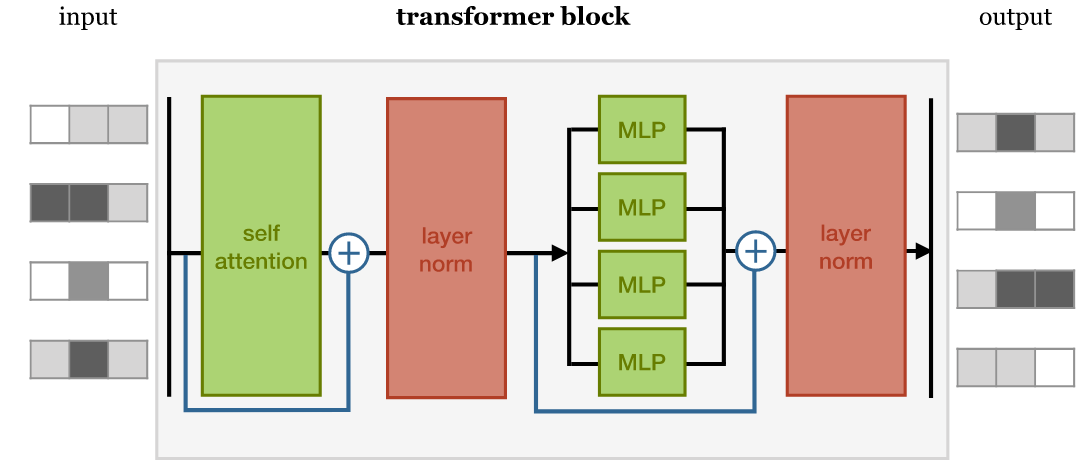

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, emb, heads, mask, seq_length, ff_hidden_mult=4, dropout=0.0):
        super().__init__()

        ## Feed forward Network is given below : 
        self.ff = nn.Sequential(
            nn.Linear(emb, ff_hidden_mult * emb),
            nn.ReLU(),
            nn.Linear(ff_hidden_mult * emb, emb)
        )

        ## For Layer Norm use nn.LayerNorm()
        ## For Drouput use nn.Dropout()
        ## Apply dropout after every layernorm (can you explain why this is done ??)
        
        ## Write your code here

    def forward(self, x):

        ## Write your code here

        return x

## Inferences and Conclusion : State all the key observations and conclusion

#**Problem 2** : Sentiment Analysis using Transformers



1. Consider IMDB sentiment classification dataset or any other sentiment classification datase (Twitter, Amazon food review), consider only Positive and Negative classes.
2. Preprocess the data using text preprocessing texhniques
3. Perform the classification task using the transformer block built earlier (Construct a Classification transformer using the transformer block built above) (Below Image shows the Classification transformer)
4. Report Test accuracy and confusion matrix


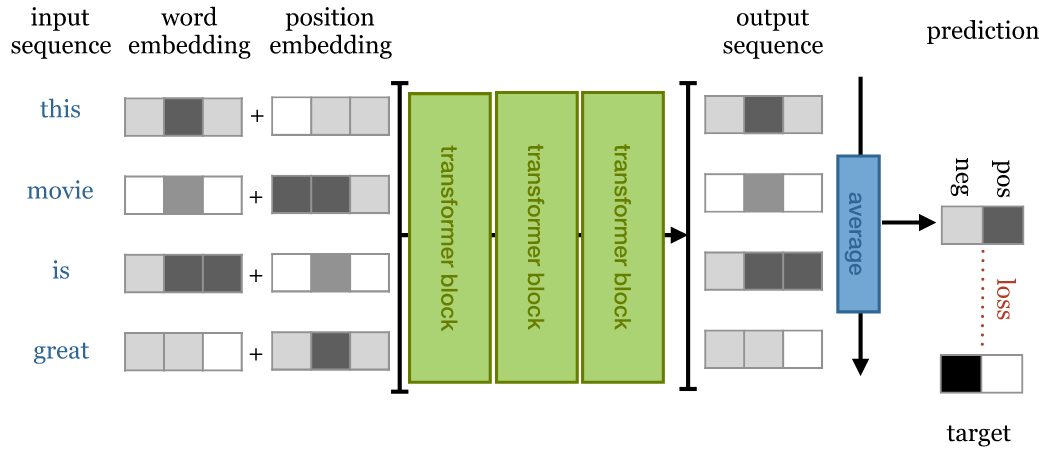

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming : 
  Please write a program to demonstrate the same

**Use the following configurations as default, you can vary these and observe the performance** : 

1. Number of Attention Heads : 8
2. Number of Transformer Blocks : 6
3. Embedding Size : 128
4. Max Sequence Length : 512

**Classification Transformer Block**

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class CTransformer(nn.Module):
    """
    Transformer for classifying sequences
    """

    def __init__(self, emb, heads, depth, seq_length, num_tokens, num_classes, max_pool=True, dropout=0.0, wide=False):
        """
        :param emb: Embedding dimension
        :param heads: nr. of attention heads
        :param depth: Number of transformer blocks
        :param seq_length: Expected maximum sequence length
        :param num_tokens: Number of tokens (usually words) in the vocabulary
        :param num_classes: Number of classes.
        :param max_pool: If true, use global max pooling in the last layer. If false, use global
                         average pooling.
        """
        super().__init__()

        ## Write your code here

        ## For token and positional embeddings use nn.Embedding() 

    def forward(self, x):

        """
        :param x: A batch by sequence length integer tensor of token indices.
        :return: predicted log-probability vectors for each token based on the preceding tokens.
        """

        ## Write your code here

        return F.log_softmax(x, dim=1)




## Inferences and Conclusion : State all the key observations and conclusion